In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('..')
from models import KNearestNeighbours

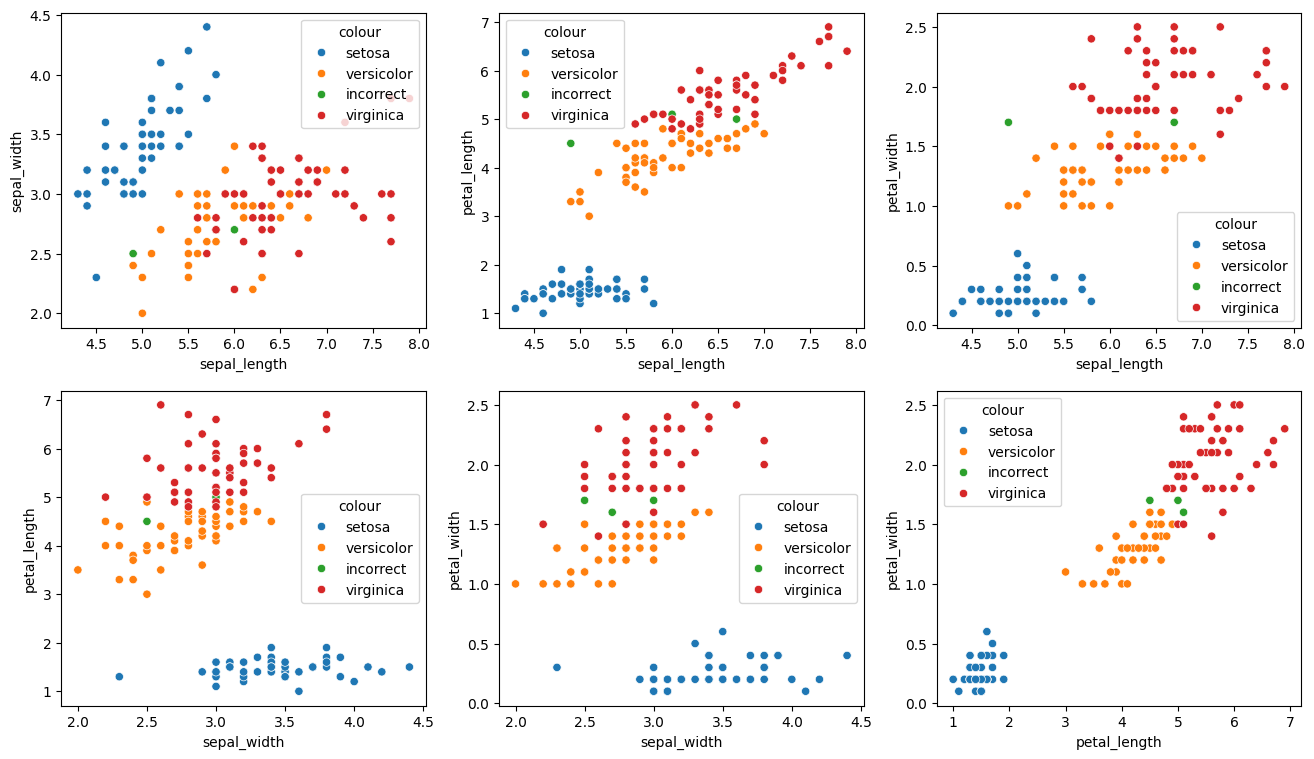

In [2]:
iris = pd.read_csv('../data/iris.csv')

X = iris.drop(columns = 'species').values
y = iris.species.values

model = KNearestNeighbours(k = 25)
model.fit(X,y)

iris['ypred'] = model.predict(X)
iris['colour'] = iris.apply(lambda row:row['species'] if row['species'] == row['ypred'] else 'incorrect', axis = 1)

fig,axes = plt.subplots(2,3)
fig.set_size_inches((16,9))

plots = list()
xCols = iris.drop(columns = ['species','ypred','colour']).columns
axes = axes.flatten()
idx = 0
for colx in xCols:
    for coly in xCols:
        if f'{colx}_{coly}' in plots or f'{coly}_{colx}' in plots or colx == coly:
            continue
        sns.scatterplot(x=iris[colx], y=iris[coly], hue=iris['colour'], ax=axes[idx])
        idx+=1
        plots.append(f'{colx}_{coly}')

In [3]:
iris.loc[iris.ypred != iris.species]

,sepal_length,sepal_width,petal_length,petal_width,species,ypred,colour
77,6.7,3.0,5.0,1.7,versicolor,virginica,incorrect
83,6.0,2.7,5.1,1.6,versicolor,virginica,incorrect
106,4.9,2.5,4.5,1.7,virginica,versicolor,incorrect


<Axes: xlabel='StackLoss'>

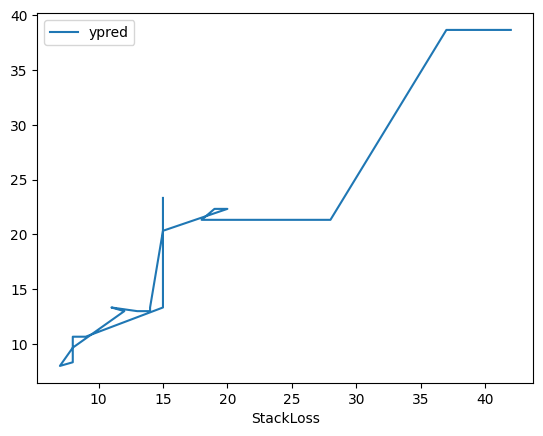

In [4]:
stackloss = pd.read_csv('../data/stackloss.csv')

X = stackloss.drop(columns='StackLoss').values
y = stackloss.StackLoss.values

model = KNearestNeighbours(k = 3)
model.fit(X,y)

stackloss['ypred'] = model.predict(X)
stackloss.plot(x = 'StackLoss',y='ypred')